<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 

✍ В первой части данного юнита мы проанализируем построенную нами таблицу c рейтингами фильмов, а во второй — рассмотрим новые данные (заказы в интернет-магазине) и выполним задания по ним.

В этом вам поможет скринкаст, в котором мы собрали самые важные моменты модуля ↓
</div>

Для решения задач нам понадобится выделить из признака title год выпуска фильма. Для этого напишем функцию get_year_release(arg).

In [1]:
# библиотека регулярных выражений
import re


def get_year_release(arg):
    # находим все слова по шаблону " (DDDD)"
    candidates = re.findall(r"\(\d{4}\)", arg)
    # проверяем число вхождений
    if len(candidates) > 0:
        # если число вхождений больше 0
        # очищаем строку от знаков "(" и ")"
        year = candidates[0].replace("(", "")
        year = year.replace(")", "")
        return int(year)
    else:
        # Если год не указан , возвращаем None
        return None

Данная функция основана на регулярных выражениях и использует модуль re, с которым мы пока не работали.

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">→ Модуль re предназначен для поиска шаблонов в тексте и встроен в язык, поэтому не нуждается в установке.</div>


<div style="border: 3px dotted white; padding: 5px; margin-right: auto;  width: 80%;"> 
ДОПОЛНИТЕЛЬНО

При желании вы можете ознакомиться с регулярными выражениями по <a href="https://tproger.ru/translations/regular-expression-python">ссылке</a>, однако это не является обязательным для выполнения заданий в этом юните.
</div>

Из модуля re нам понадобится только функция <a href="https://docs-python.ru/standart-library/modul-re-python/funktsija-findall-modulja-re/">findall()</a>, которая позволяет найти в строке все слова, удовлетворяющие шаблону. Мы находим в строке с названием фильма шаблон "(DDDD)" — четыре цифры, обёрнутых в скобки, что соответствует году выпуска фильма. Если такого шаблона не было найдено (год выпуска не указан), функция возвращает None (в таблице это будет помечено как пропуск).

<div style="background-color: #e0ffd1;color: black;border: 3px solid black; padding: 15px; margin-right: 500px; width: 80%;">Совет: для выполнения заданий используйте изученные в этом модуле методы.</div>

###  Задание 8.1

Создайте в таблице новый признак year_release, который соответствует году выпуска фильма.

У скольких фильмов не указан год их выпуска?

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 18<br>
- Подсказка (1 из 2): Признак года выпуска фильма создаётся с помощью применения функции get_year_release к столбцу title.<br>
- Подсказка (2 из 2): Число непустых значений в столбце можно узнать с помощью метода info().
</code>
</details>

In [2]:
import pandas as pd

In [7]:
ratings = pd.read_csv("./data/ratings_movies.csv")

In [8]:
ratings.head()

,Unnamed: 0,userId,movieId,rating,date,title,genres
0,0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [11]:
ratings["year_release"] = ratings["title"].apply(get_year_release)
ratings.head()

,Unnamed: 0,userId,movieId,rating,date,title,genres,year_release
0,0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0
2,2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0
3,3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0


In [14]:
ratings["year_release"].isna().sum()

18

###   Задание 8.2

Какой фильм, выпущенный в 1999 году, получил наименьшую среднюю оценку зрителей?

В качестве ответа запишите название этого фильма без указания года его выпуска.

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 18<br>
- Подсказка (1 из 2): Признак года выпуска фильма создаётся с помощью применения функции get_year_release к столбцу title.<br>
- Подсказка (2 из 2): Число непустых значений в столбце можно узнать с помощью метода info().
</code>
</details>

In [23]:
mask1 = ratings["year_release"] == 1999
ratings[mask1].groupby("title")["rating"].mean().sort_values()

title
Bloodsport: The Dark Kumite (1999)            0.5
Simon Sez (1999)                              1.0
Chill Factor (1999)                           1.0
Source, The (1999)                            1.0
Trippin' (1999)                               1.0
                                             ... 
Trailer Park Boys (1999)                      5.0
Larry David: Curb Your Enthusiasm (1999)      5.0
Sun Alley (Sonnenallee) (1999)                5.0
George Carlin: You Are All Diseased (1999)    5.0
Five Senses, The (1999)                       5.0
Name: rating, Length: 261, dtype: float64

###    Задание 8.3

Какое сочетание жанров фильмов (genres), выпущенных в 2010 году, получило наименьшую среднюю оценку (rating)?

Запишите сочетание так же, как оно указано в таблице (через разделитель |, без пробелов).
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 18<br>
- Подсказка (1 из 2): Признак года выпуска фильма создаётся с помощью применения функции get_year_release к столбцу title.<br>
- Подсказка (2 из 2): Число непустых значений в столбце можно узнать с помощью метода info().
</code>
</details>

In [24]:
mask1 = ratings["year_release"] == 2010
ratings[mask1].groupby("genres")["rating"].mean().sort_values()

genres
Action|Sci-Fi                        1.000000
Action|Adventure|Horror              1.500000
Action|Drama|Fantasy                 1.500000
Crime|Romance                        1.500000
Adventure|Comedy|Fantasy             1.833333
                                       ...   
Crime                                4.750000
Comedy|Musical                       5.000000
Animation|Drama|Fantasy|Mystery      5.000000
Adventure|Children|Comedy|Mystery    5.000000
Animation|Children|Mystery           5.000000
Name: rating, Length: 119, dtype: float64

###    Задание 8.4

Какой пользователь (userId) посмотрел наибольшее количество различных (уникальных) комбинаций жанров (genres) фильмов? В качестве ответа запишите идентификатор этого пользователя.
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 599<br>
- Подсказка (1 из 3): Сгруппируйте таблицу по пользователям и найдите число уникальных жанров для каждого пользователя.<br>
- Подсказка (2 из 3): Отсортируйте результат по убыванию.<br>
- Подсказка (3 из 3): Индекс первой строки результирующей таблицы будет являться ответом.
</code>
</details>

In [30]:
ratings.groupby("userId")["genres"].agg(["nunique", "count"]).sort_values(
    by="nunique", ascending=False
)

,nunique,count
userId,,
599,524,2478
414,482,2698
448,403,1864
380,399,1218
474,395,2108
...,...,...
578,15,27
12,15,32
85,13,34


###     Задание 8.5

Найдите пользователя, который выставил наименьшее количество оценок, но его средняя оценка фильмам наибольшая.

В качестве ответа укажите идентификатор этого пользователя.

Чтобы рассчитать несколько параметров для каждого пользователя (количество оценок и среднюю оценку), можно воспользоваться методом agg() на сгруппированных данных.
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 53<br>
- Подсказка (1 из 4): Сгруппируйте таблицу по пользователям (userId).<br>
- Подсказка (2 из 4): Для каждого пользователя рассчитайте количество выставленных им оценок и средний рейтинг.<br>
- Подсказка (3 из 4): Отсортируйте таблицу по возрастанию количества оценок и по убыванию среднего рейтинга.<br>
- Подсказка (4 из 4): Индекс первой строки результирующей таблицы будет являться ответом.
</code>
</details>

In [31]:
ratings.groupby("userId")["rating"].agg(["count", "mean"]).sort_values(
    by=["count", "mean"], ascending=[True, False]
)

,count,mean
userId,,
53,20,5.000000
595,20,4.200000
189,20,4.100000
569,20,4.000000
278,20,3.875000
...,...,...
274,1346,3.235884
448,1864,2.847371
474,2108,3.398956


###     Задание 8.6

Найдите сочетание жанров (genres) за 2018 год, которое имеет наибольший средний рейтинг (среднее по столбцу rating), и при этом число выставленных ему оценок (количество значений в столбце rating) больше 10.

Запишите сочетание так же, как оно указано в таблице (через разделитель |, без пробелов).
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 Action|Adventure|Sci-Fi<br>
- Подсказка (1 из 6): Произведите фильтрацию по условию «год выпуска 2018».<br>
- Подсказка (2 из 6): Сгруппируйте отфильтрованную таблицу по жанрам и найдите средний рейтинг, а также количество выставленных оценок с помощью метода agg().<br>
- Подсказка (3 из 6): Сохраните сгруппированную таблицу.<br>
- Подсказка (4 из 6): Произведите фильтрацию полученной таблицы по условию «количество оценок > 10».<br>
- Подсказка (5 из 6): Отсортируйте результат по столбцу со средним значением по убыванию.<br>
- Подсказка (6 из 6): Индекс первой строки результирующей таблицы будет являться ответом.
</code>
</details>

In [46]:
mask1 = ratings["year_release"] == 2018
filtered_rating = (
    ratings[mask1]
    .groupby("genres")["rating"]
    .agg(["count", "mean"])
    .sort_values(by="mean", ascending=False)
)
filtered_rating[filtered_rating["count"] > 10]

,count,mean
genres,,
Action|Adventure|Sci-Fi,14,3.928571
Action|Comedy|Sci-Fi,12,3.875000


###     Задание 8.7

Добавьте в таблицу новый признак year_rating — год выставления оценки. Создайте сводную таблицу, которая иллюстрирует зависимость среднего рейтинга фильма от года выставления оценки и жанра. Выберите верные варианты ответа, исходя из построенной таблицы:
- A За весь период (с 1996 по 2018 год) сочетание жанров Action|Adventure ни разу не получало среднюю оценку ниже 3.
- B Наилучшую оценку жанр Action|Adventure|Animation|Children|Comedy|IMAX получил в 2010 году.
- C Среди сочетаний жанров, получивших наивысшую среднюю оценку в 2018 году, есть сочетание Animation|Children|Mystery.
- D Для жанра Comedy прослеживается тенденция падения рейтинга с каждым годом (с 1996 по 2018). 
<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
Ответ A/C<br>
- A Если посмотреть оценки жанра Action|Adventure, обратившись к сводной таблице по этому столбцу, оценок ниже 3 не оказывается.<br>
- C Если обратиться к сводной таблице по индексу 2018 года и отсортировать результат по убыванию, то среди жанров, получивших наивысшую оценку, можно найти сочетание Animation|Children|Mystery.
</code>
</details>

In [48]:
ratings["year_rating"] = pd.to_datetime(ratings["date"]).dt.year
ratings.head()

,Unnamed: 0,userId,movieId,rating,date,title,genres,year_release,year_rating
0,0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,2000
1,1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,2000
2,2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,2000
3,3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,2000
4,4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,2000


In [52]:
pivot = pd.pivot_table(
    ratings, values="rating", index="genres", columns="year_rating", aggfunc="mean"
)
pivot

year_rating,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
genres,,,,,,,,,,,,,,,,,,,,,
(no genres listed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,3.500000,3.000000,3.676471
Action,2.730769,3.538462,NaN,NaN,2.588235,3.000000,2.750000,3.833333,2.700000,3.357143,...,NaN,3.500000,4.500000,2.625000,2.500000,NaN,3.100000,3.545455,2.637931,2.588235
Action|Adventure,3.454545,4.150000,4.2,4.0,3.738462,3.500000,4.304348,3.277778,4.136364,3.413043,...,3.714286,3.437500,3.888889,3.900000,3.833333,3.875,3.560976,3.722222,3.527778,3.397436
Action|Adventure|Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.000,3.800000,3.750000,3.375000,3.650000
Action|Adventure|Animation|Children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.000000,3.000000,3.500,3.666667,3.833333,3.500000,3.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller,2.666667,3.400000,NaN,4.0,2.142857,2.500000,3.600000,3.142857,NaN,2.750000,...,4.000000,2.500000,1.833333,3.500000,3.833333,NaN,3.764706,3.916667,3.750000,3.562500
Sci-Fi|Thriller|IMAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,3.666667,4.000000,4.000,4.000000,3.666667,2.500000,NaN
Thriller,3.838095,3.923077,3.8,3.7,3.087912,3.477273,3.583333,3.250000,3.464286,3.411765,...,2.964286,2.833333,3.625000,3.083333,3.666667,4.000,2.911765,3.432432,3.152174,3.296296


A За весь период (с 1996 по 2018 год) сочетание жанров Action|Adventure ни разу не получало среднюю оценку ниже 3. 

In [56]:
pivot.loc["Action|Adventure"].min()

3.2777777777777777

B Наилучшую оценку жанр Action|Adventure|Animation|Children|Comedy|IMAX получил в 2010 году. 

In [58]:
pivot.loc["Action|Adventure|Animation|Children|Comedy|IMAX"]

year_rating
1996         NaN
1997         NaN
1998         NaN
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009    3.250000
2010    3.500000
2011         NaN
2012    3.550000
2013    5.000000
2014    3.500000
2015    3.375000
2016    3.666667
2017    1.000000
2018    3.700000
Name: Action|Adventure|Animation|Children|Comedy|IMAX, dtype: float64

C Среди сочетаний жанров, получивших наивысшую среднюю оценку в 2018 году, есть сочетание Animation|Children|Mystery. 

In [77]:
mask1 = pivot[2018] == pivot[2018].max()
mask2 = pivot.index.str.startswith("Anim")
pivot.loc[mask1 & mask2, 2018]

genres
Animation|Children|Mystery               5.0
Animation|Comedy|Drama                   5.0
Animation|Comedy|Drama|Fantasy|Sci-Fi    5.0
Animation|Comedy|Fantasy|Musical         5.0
Animation|Crime|Drama                    5.0
Name: 2018, dtype: float64

D Для жанра Comedy прослеживается тенденция падения рейтинга с каждым годом (с 1996 по 2018). 

<Axes: xlabel='year_rating'>

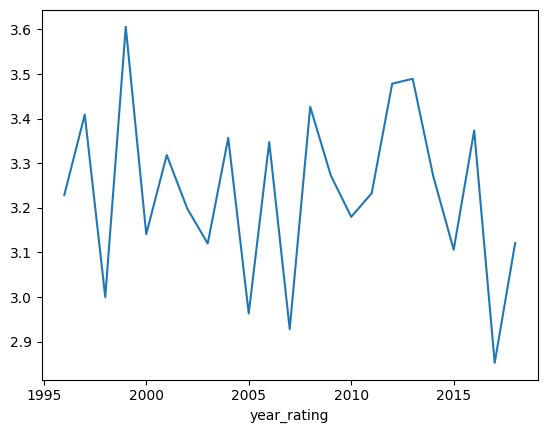

In [87]:
# mask1 = pivot.index.str.contains('Comedy')
mask1 = pivot.index == "Comedy"
pivot.loc[mask1].iloc[0].plot()

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">✍ А теперь поговорим о заказах в интернет-магазине.</div>

Дано два файла:
- orders.csv, содержащий данные о заказах;
- products.csv, содержащий данные о товарах.


Прочитайте данные файлы, посмотрите на содержимое таблиц и проанализируйте его.

Подумайте, как связаны данные таблицы (какими ключевыми столбцами).

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">Объедините заданные таблицы в таблицу orders_products, чтобы в результирующей таблице оказалась информация обо всех заказах, но не оказалось информации о продуктах, на которых заказов ещё не поступало. </div>

In [99]:
orders_df = pd.read_csv("./data/orders.csv", sep=";")
products_df = pd.read_csv("./data/products.csv", sep=";")

In [101]:
print(orders_df.shape[0])
orders_df.head()

18


,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество
0,09.11.2019 21:55:51,9,10,"Принят, ожидается оплата",Нет,Нет,Нет,103,5
1,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,86,100
2,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,104,10
3,09.11.2019 12:50:07,7,8,"Принят, ожидается оплата",Нет,Нет,Нет,104,7
4,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,104,5


In [102]:
print(products_df.shape[0])
products_df.head()

14


,Product_ID,Name,Price,CURRENCY
0,47,Шатны Полосатый рейс,2999,RUR
1,51,Платье Аленький цветочек,4999,RUR
2,53,Штаны Цветочная Поляна,4999,RUR
3,71,Платье Ночная Жизнь,7999,RUR
4,74,Платье Ночная Жизнь XXXL,8999,RUR


In [105]:
prod_orders_df = pd.merge(
    orders_df,
    right=products_df.set_index("Product_ID"),
    left_on="ID товара",
    right_on="Product_ID",
    how="left",
    validate="many_to_one",
)
print(prod_orders_df.shape[0])
prod_orders_df.head()

18


,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Name,Price,CURRENCY
0,09.11.2019 21:55:51,9,10,"Принят, ожидается оплата",Нет,Нет,Нет,103,5,"Носки Подарочные, муж",199.0,RUR
1,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,86,100,"Носки Простые, муж",45.0,RUR
2,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,104,10,"Носки Подарочные, жен",249.0,RUR
3,09.11.2019 12:50:07,7,8,"Принят, ожидается оплата",Нет,Нет,Нет,104,7,"Носки Подарочные, жен",249.0,RUR
4,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,104,5,"Носки Подарочные, жен",249.0,RUR


###  Задание 8.8

Какой идентификатор (Order ID) имеет заказ, для которого не оказалось информации о товаре?

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
0
</code>
</details>

In [118]:
prod_orders_df[prod_orders_df["Name"].isna()]

,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Product_ID,Name,Price,CURRENCY
17,01.01.2001 00:00:00,0,1,"Оплачен, формируется к отправке",Да,Нет,Нет,666,1,NaN,NaN,NaN,NaN


###  Задание 8.9

На какой товар была произведена отмена?

В качестве ответа запишите название этого товара (Name).

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 Носки беговые Camino
</code>
</details>

In [119]:
prod_orders_df[prod_orders_df["Отменен"] == "Да"]

,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Product_ID,Name,Price,CURRENCY
6,08.11.2019 08:36:22,5,5,Отменён,Нет,Да,Нет,124,1,124.0,Носки беговые Camino,999.0,RUR


###   Задание 8.10

Какой покупатель принёс наибольшую суммарную прибыль интернет-магазину за указанный период?

В ответ запишите идентификатор этого покупателя (ID Покупателя).

Прибыль состоит только из оплаченных заказов и рассчитывается как количество купленного товара, умноженное на его цену.

<details>
<summary><strong>Show answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    7<br>
- Подсказка (1 из 3): Cоздайте признак прибыли за один заказ — profit — количество товара * цена товара.<br>
- Подсказка (2 из 3): Произведите фильтрацию по условию оплаченного заказа.<br>
- Подсказка (3 из 3): Сгруппируйте таблицу по столбцу с идентификатором покупателя и рассчитайте суммарную цену товаров, заказанных ими. Отсортируйте результат по убыванию. Идентификатор покупателя в первой строке полученного топа — наш ответ.
</code>
</details>

In [129]:
mask1 = prod_orders_df["Оплачен"] == "Да"
prod_orders_df["Income"] = prod_orders_df["Price"] * prod_orders_df["Количество"]
prod_orders_df[mask1].groupby("ID Покупателя")[["Income"]].sum().sort_values(
    by="Income", ascending=False
)

,Income
ID Покупателя,
7,17096.0
5,13043.0
8,1344.0
1,0.0


<div style="border: 1px solid white; padding: 5px; margin-right: auto;  width: 80%;"> 
✍ В этом модуле мы:<br>
- изучили продвинутые методы работы с данными, которые позволяют более детально взглянуть на данные в разрезе одного или нескольких признаков;<br>
- увидели, как строятся сводные таблицы и каким образом на их основе делаются выводы и проводится анализ;<br>
- вновь затронули тему предобработки данных — научились работать с несколькими таблицами и правильно объединять их.
</div>

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">→ Очевидно, что важно уметь различать способы объединений, чтобы грамотно объединять предоставленные вам таблицы и не терять из них необходимую вам информацию.</div``>